# Solucion del Analisis Datos socio demográficos y de recursos de salud a nivel de condado de EE. UU. (2018-2019)

### Paso 1: Carga del conjunto de datos a tu modelo

In [26]:
# Your code here

import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv", sep = ",")
total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


### Paso 2: Realiza un EDA completo

Veaos primeros las dimimension del dataframe

In [27]:
# Obtener dimensiones
total_data.shape

(3140, 108)

Lo anterior revela que, el DataFrame contiene 3140 registros (numero total de filas) y 108 variables (numero total de columnas).

Ahora vamoa a bbtener información sobre tipos de datos y valores no nulos

In [28]:
# Información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


Lo anterior revela que:

* Los datos en estas columnas son principalmente números (flotantes y enteros), con algunas columnas que contienen datos de tipo objeto (posiblemente texto o fechas). 
* El DataFrame ocupa alrededor de 2.6 megabytes de memoria.

In [29]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


#### Analisis de variables univariadas

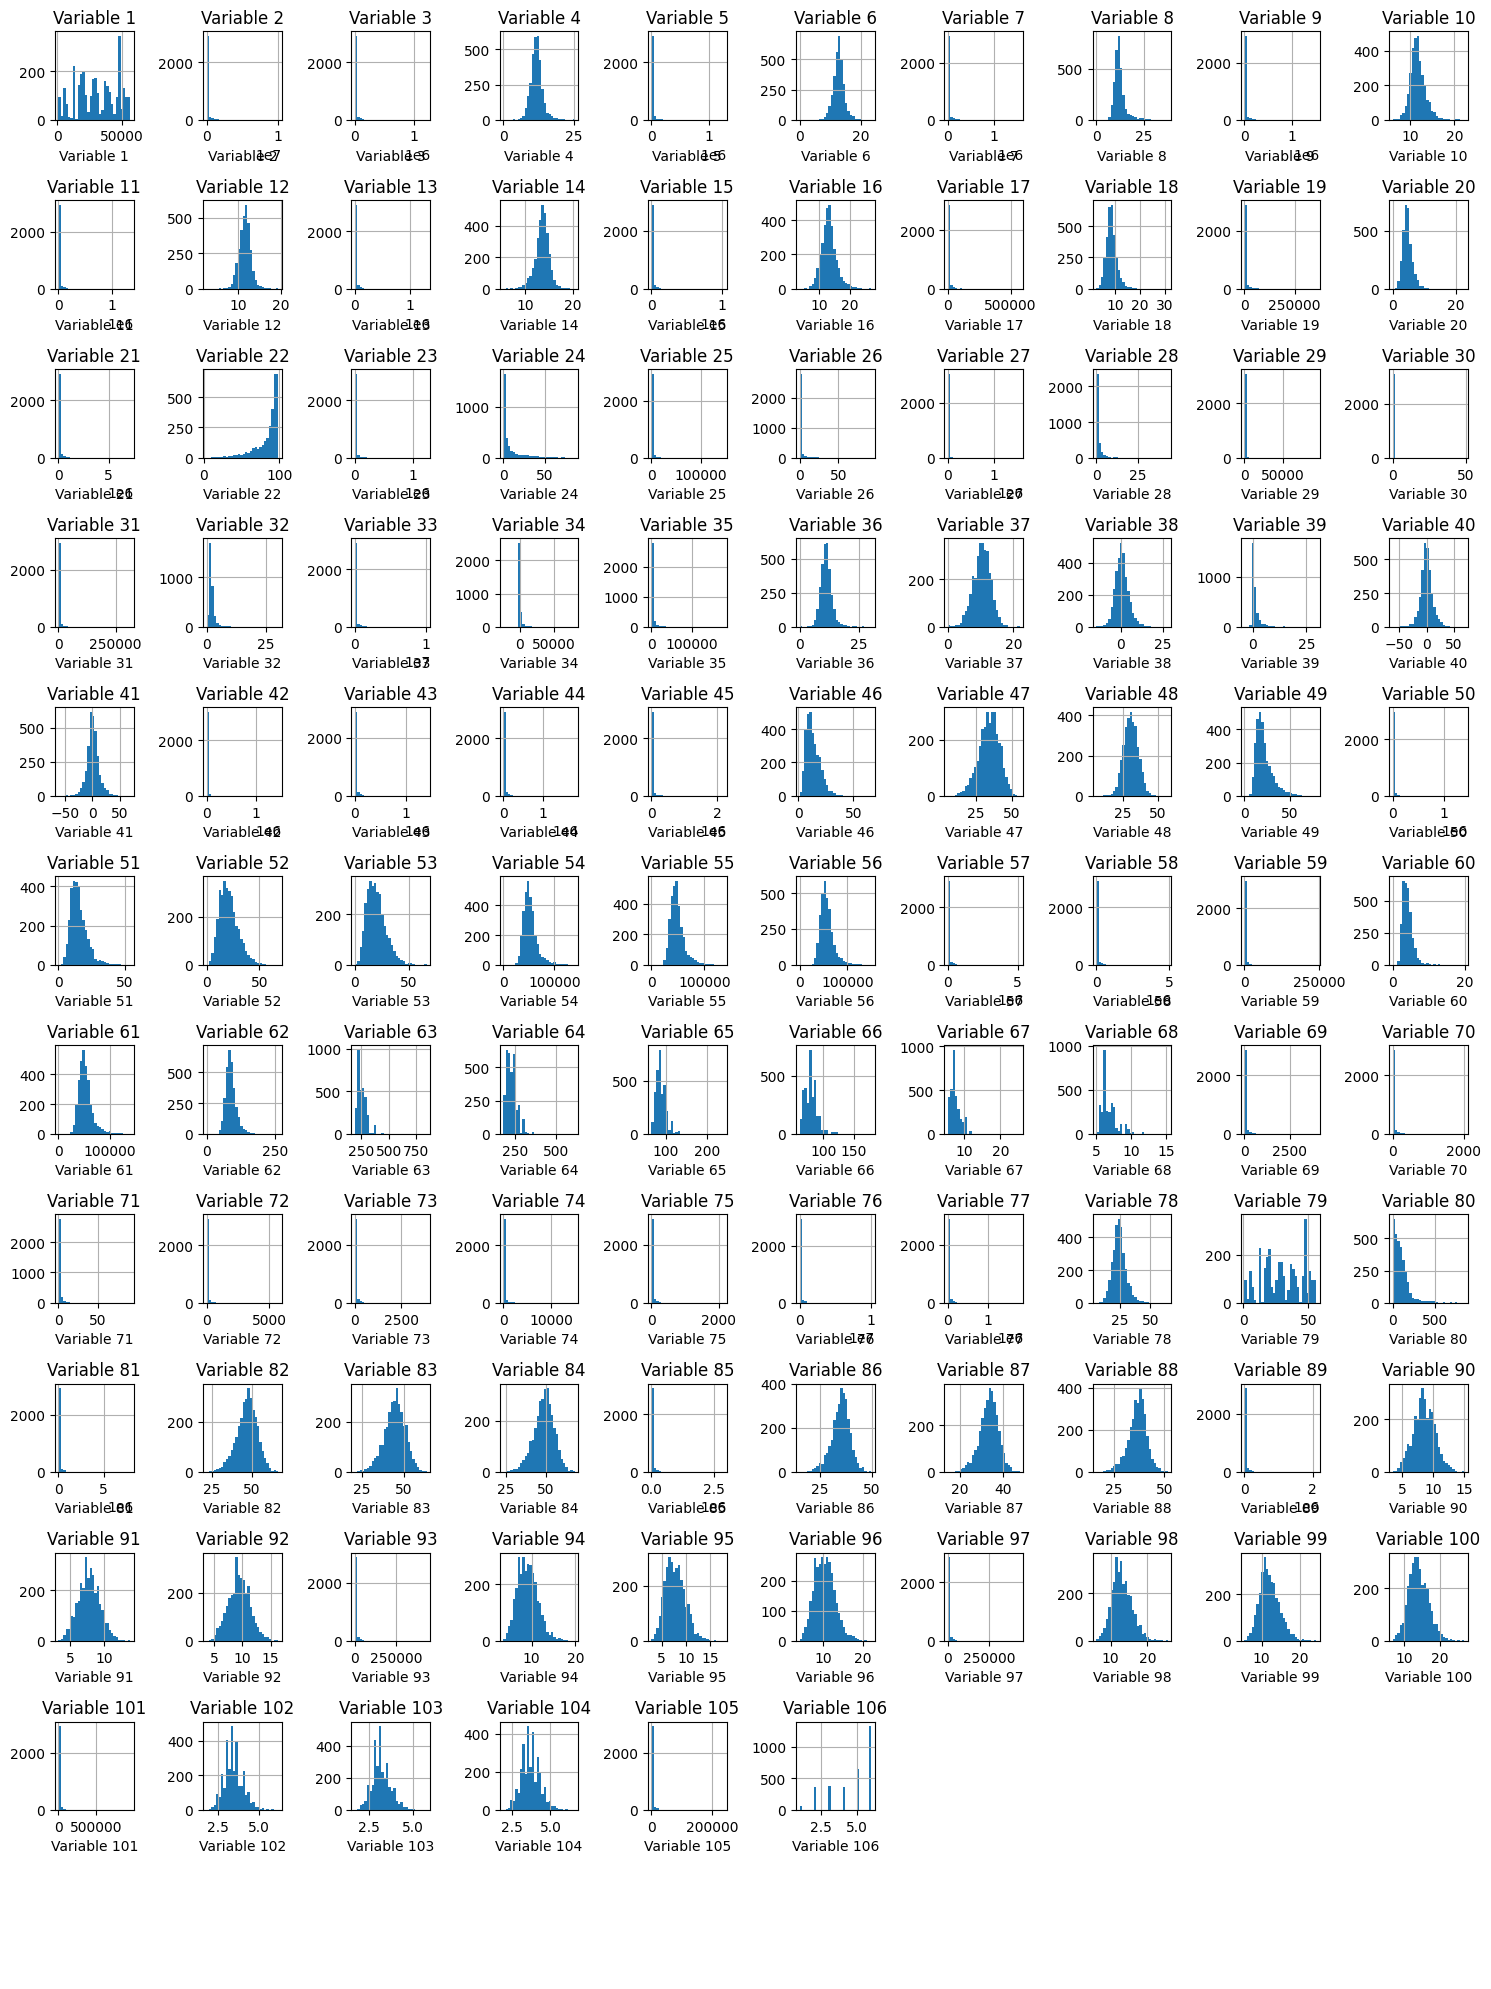

In [30]:
import matplotlib.pyplot as plt

def plot_all_histograms_single_figure(df, n_rows, n_cols, figsize=(15, 20)):
    """
    Traza histogramas para todas las columnas numéricas en un DataFrame en una sola figura con subgráficos.

    Args:
        df: El DataFrame que contiene los datos.
        n_rows: Numero de filas en la cuadricula de la subtrama.
        n_cols: Numero de columnas en la cuadricula de la subtrama.
        figsize: Tupla que especifica el ancho y la altura de la figura.
    """

    # Seleccionar solo las columnas numéricas
    num_cols = df.select_dtypes(include=['number']).columns

    # Crear una figura con subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    # Aplanar la matriz de ejes para iterar más fácilmente
    axes = axes.flatten()

    # Iterar sobre cada columna y crear un histograma
    for i, col in enumerate(num_cols):
        if i < len(axes):
            ax = axes[i]
            df[col].hist(ax=ax, bins=30)
            ax.set_title(f"Variable {i+1}")#, rotation=45, ha='right')  # Mostrar el índice de la columna
            ax.set_xlabel(f"Variable {i+1}") #, rotation=45, ha='right')
            #ax.set_ylabel('Frecuencia')

    # Ocultar subplots vacíos si hay menos columnas que subplots
    for i in range(len(num_cols), len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Llamar a la función con tu DataFrame y el número deseado de filas y columnas
plot_all_histograms_single_figure(total_data, 12, 10)

In [31]:
print("Los nombres de las variables son:")
print(" ")
for i, col in enumerate(total_data):
    print(f"Variable {i+1:2}: {col}")

Los nombres de las variables son:
 
Variable  1: fips
Variable  2: TOT_POP
Variable  3: 0-9
Variable  4: 0-9 y/o % of total pop
Variable  5: 19-Oct
Variable  6: 10-19 y/o % of total pop
Variable  7: 20-29
Variable  8: 20-29 y/o % of total pop
Variable  9: 30-39
Variable 10: 30-39 y/o % of total pop
Variable 11: 40-49
Variable 12: 40-49 y/o % of total pop
Variable 13: 50-59
Variable 14: 50-59 y/o % of total pop
Variable 15: 60-69
Variable 16: 60-69 y/o % of total pop
Variable 17: 70-79
Variable 18: 70-79 y/o % of total pop
Variable 19: 80+
Variable 20: 80+ y/o % of total pop
Variable 21: White-alone pop
Variable 22: % White-alone
Variable 23: Black-alone pop
Variable 24: % Black-alone
Variable 25: Native American/American Indian-alone pop
Variable 26: % NA/AI-alone
Variable 27: Asian-alone pop
Variable 28: % Asian-alone
Variable 29: Hawaiian/Pacific Islander-alone pop
Variable 30: % Hawaiian/PI-alone
Variable 31: Two or more races pop
Variable 32: % Two or more races
Variable 33: POP_ES

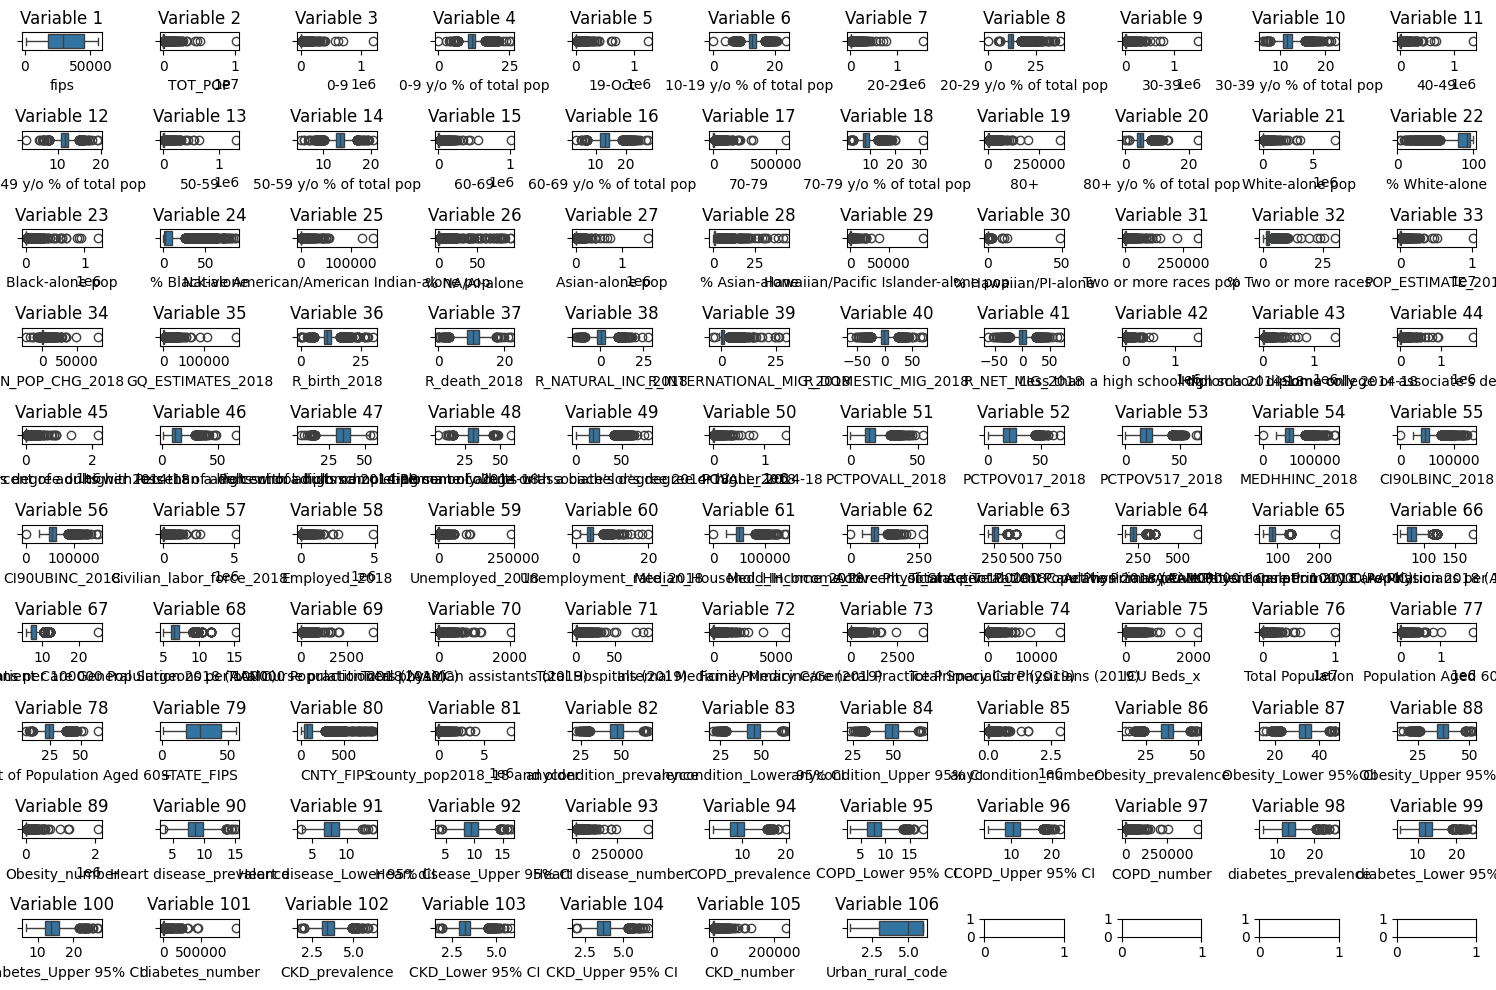

In [32]:
import seaborn as sns  # Importar Seaborn

def plot_boxplots_grid(df, n_rows, n_cols, figsize=(15, 10)):
    """
    Crea una cuadrícula de diagramas de caja para todas las variables numéricas de un DataFrame.

    Args:
        df: El DataFrame que contiene los datos.
        n_rows: Número de filas en la cuadrícula de subplots.
        n_cols: Número de columnas en la cuadrícula de subplots.
        figsize: Tupla que especifica el ancho y la altura de la figura.
    """

    # Seleccionar solo las columnas numéricas
    num_cols = df.select_dtypes(include=['number']).columns

    # Crear una figura con subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    # Iterar sobre cada columna y crear un diagrama de caja
    for i, col in enumerate(num_cols):
        if i < len(axes):
            ax = axes[i]
            sns.boxplot(x=df[col], ax=ax)
            ax.set_title(f"Variable {i+1}")

    # Ajustar el diseño de la figura
    plt.tight_layout()
    plt.show()

# Llamar a la función con tu DataFrame y el número deseado de filas y columnas
plot_boxplots_grid(total_data, 10, 11)

Del histograma anteior podemos indicar que:

 + Existen variables cuya distribucion empirica pareciera asemejarse a una distribucion con simetria, y estas descatan contra aquellas que poseen distribucion empirica con asimetrias.

 + Los digramas de cajas revelan que la gran mayoria de la data posee valores que no se encuentran entre el 75% de la data central,salvo las variables 1 y 79.


#### Ingenieria de caracteristicas

Veamos los estadisticos de los datos

In [33]:
total_data.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,...,5827.242357,13.073503,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,2.124081,4.228439e+04,1.815044,4.957773e+04,3.126297,4.899095e+04,1.696599,...,15720.551934,2.724351,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.100000e+01,6.092789,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,10.594639,1.374500e+03,11.674504,1.263750e+03,10.496774,1.232750e+03,10.689322,...,815.000000,11.200000,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,11.802727,3.274000e+03,12.687422,3.108000e+03,11.772649,3.000500e+03,11.580861,...,1963.500000,12.800000,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,12.951840,8.822250e+03,13.659282,8.976250e+03,13.182260,8.314250e+03,12.639379,...,4727.000000,14.800000,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000
max,56045.000000,1.010552e+07,1.208253e+06,25.460677,1.239139e+06,23.304372,1.557073e+06,37.570198,1.501844e+06,22.225129,...,434075.000000,25.600000,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000


como existe diferentes escalas, procederemos a normalizar los datos con el maximo y el minimo



In [34]:
from sklearn.preprocessing import StandardScaler

data_types = total_data.dtypes
numeric_columns = [c for c in list(data_types[data_types != "object"].index) if c != "Heart disease_number"]

scaler = StandardScaler()
norm_features = scaler.fit_transform(total_data[numeric_columns])

# Create a new DataFrame with the scaled numerical variables
total_data_scal = pd.DataFrame(norm_features, index = total_data.index, columns = numeric_columns)
total_data_scal["Heart disease_number"] = total_data["Heart disease_number"]
total_data_scal.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,Heart disease_number
0,-1.940874,-0.145679,-0.142421,0.158006,-0.135556,0.573496,-0.153144,0.027610,-0.139384,0.588469,...,-0.063696,-0.071720,-0.089834,-0.129902,-0.609615,-0.582796,-0.669652,-0.147523,-1.082865,3345
1,-1.940742,0.341296,0.287476,-0.242861,0.320383,-0.193107,0.183774,-0.469965,0.230620,-0.110300,...,-0.394103,-0.414900,-0.337677,0.376251,-0.433549,-0.393279,-0.343373,0.389791,-0.420704,13414
2,-1.940610,-0.237785,-0.239429,-0.419441,-0.246181,-0.439718,-0.225971,0.272104,-0.218759,0.656538,...,2.432709,2.483064,2.317776,-0.183415,1.855312,1.880929,1.777443,-0.204321,0.903618,2159
3,-1.940478,-0.245223,-0.246032,-0.426966,-0.254791,-0.609076,-0.230792,0.396168,-0.220555,1.264959,...,0.376846,0.423984,0.299632,-0.229096,-0.257483,-0.203761,-0.180233,-0.242100,-1.745026,1533
4,-1.940346,-0.138966,-0.135053,0.186249,-0.137140,0.216679,-0.155888,-0.200808,-0.143570,0.088582,...,0.156575,0.195197,0.158008,-0.111247,-0.081417,-0.014244,-0.017093,-0.124105,-1.745026,4101


#### Seleccion de las caracteristicas

En este proceso guardamos los datos sin procesar

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

X = total_data_scal.drop(columns=["Heart disease_number"])
y = total_data_scal["Heart disease_number"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
train_indices = list(X_train.index)
test_indices = list(X_test.index)

k = int(len(X_train.columns) * 0.3)
selection_model = SelectKBest(score_func = f_regression, k = k)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number
0,-0.232556,-0.227731,-0.234284,-0.232951,-0.226353,-0.231316,-0.229599,-0.233425,-0.234680,-0.234420,...,-0.212643,-0.208590,-0.231195,-0.229737,-0.233171,-0.234370,-0.232975,-0.223516,-0.218609,-0.219329
1,-0.158676,-0.178665,-0.180166,-0.188266,-0.175070,-0.161168,-0.134688,-0.105618,-0.119270,-0.091822,...,-0.116680,-0.110850,-0.150293,-0.098866,-0.152859,-0.142645,-0.155304,-0.110080,-0.131449,-0.130962
2,-0.199114,-0.211128,-0.195138,-0.166782,-0.195036,-0.194045,-0.199725,-0.219256,-0.222207,-0.205154,...,-0.192263,-0.217668,-0.197005,-0.216056,-0.195125,-0.193205,-0.201976,-0.193106,-0.189197,-0.206391
3,-0.036595,-0.037734,-0.017077,-0.057986,-0.052252,-0.033158,-0.020228,-0.032603,-0.023876,-0.046224,...,0.062458,-0.107888,-0.036940,-0.030034,-0.039882,-0.003321,0.006163,-0.007077,-0.047515,-0.045054
4,0.090839,0.094680,0.101662,0.056721,0.042392,0.068095,0.101699,0.144664,0.140685,0.166099,...,0.274818,0.194913,0.097767,0.161314,0.088485,0.165555,0.182740,0.265603,0.123040,0.132454


In [36]:
X_test_sel.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number
0,-0.285286,-0.285362,-0.294836,-0.269566,-0.258568,-0.268541,-0.289649,-0.312989,-0.316763,-0.286734,...,-0.303292,-0.285225,-0.284324,-0.308211,-0.283698,-0.302439,-0.302292,-0.324038,-0.276290,-0.281172
1,0.496553,0.433072,0.392170,0.544659,0.453677,0.391480,0.499744,0.668639,0.716353,0.476084,...,0.853184,0.424904,0.477184,0.620724,0.517408,0.527360,0.516364,0.443806,0.418504,0.454092
2,-0.260191,-0.255123,-0.265837,-0.246628,-0.234723,-0.240703,-0.264552,-0.289867,-0.289846,-0.290962,...,-0.277451,-0.261868,-0.257294,-0.287868,-0.259943,-0.249299,-0.259877,-0.225107,-0.225970,-0.242229
3,0.039389,0.058341,0.059701,-0.018647,0.003236,0.030594,0.074401,0.091003,0.060721,0.005012,...,0.197267,0.130719,0.036299,0.055281,0.031494,0.035274,0.026108,0.136643,0.003409,0.022352
4,0.364272,0.281232,0.323623,0.525353,0.295990,0.288317,0.298029,0.461297,0.497760,0.351393,...,0.659217,0.305024,0.336581,0.423969,0.390596,0.271127,0.273318,0.329669,0.256620,0.334804


In [37]:
X_train_sel["Heart disease_number"] = list(y_train)
X_test_sel["Heart disease_number"] = list(y_test)

X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [38]:
total_data = pd.concat([X_train_sel, X_test_sel])
total_data.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number,Heart disease_number
0,-0.232556,-0.227731,-0.234284,-0.232951,-0.226353,-0.231316,-0.229599,-0.233425,-0.234680,-0.234420,...,-0.208590,-0.231195,-0.229737,-0.233171,-0.234370,-0.232975,-0.223516,-0.218609,-0.219329,2072
1,-0.158676,-0.178665,-0.180166,-0.188266,-0.175070,-0.161168,-0.134688,-0.105618,-0.119270,-0.091822,...,-0.110850,-0.150293,-0.098866,-0.152859,-0.142645,-0.155304,-0.110080,-0.131449,-0.130962,3796
2,-0.199114,-0.211128,-0.195138,-0.166782,-0.195036,-0.194045,-0.199725,-0.219256,-0.222207,-0.205154,...,-0.217668,-0.197005,-0.216056,-0.195125,-0.193205,-0.201976,-0.193106,-0.189197,-0.206391,2222
3,-0.036595,-0.037734,-0.017077,-0.057986,-0.052252,-0.033158,-0.020228,-0.032603,-0.023876,-0.046224,...,-0.107888,-0.036940,-0.030034,-0.039882,-0.003321,0.006163,-0.007077,-0.047515,-0.045054,5484
4,0.090839,0.094680,0.101662,0.056721,0.042392,0.068095,0.101699,0.144664,0.140685,0.166099,...,0.194913,0.097767,0.161314,0.088485,0.165555,0.182740,0.265603,0.123040,0.132454,8686


In [39]:
X_test_sel.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number,Heart disease_number
0,-0.285286,-0.285362,-0.294836,-0.269566,-0.258568,-0.268541,-0.289649,-0.312989,-0.316763,-0.286734,...,-0.285225,-0.284324,-0.308211,-0.283698,-0.302439,-0.302292,-0.324038,-0.276290,-0.281172,698
1,0.496553,0.433072,0.392170,0.544659,0.453677,0.391480,0.499744,0.668639,0.716353,0.476084,...,0.424904,0.477184,0.620724,0.517408,0.527360,0.516364,0.443806,0.418504,0.454092,13982
2,-0.260191,-0.255123,-0.265837,-0.246628,-0.234723,-0.240703,-0.264552,-0.289867,-0.289846,-0.290962,...,-0.261868,-0.257294,-0.287868,-0.259943,-0.249299,-0.259877,-0.225107,-0.225970,-0.242229,1768
3,0.039389,0.058341,0.059701,-0.018647,0.003236,0.030594,0.074401,0.091003,0.060721,0.005012,...,0.130719,0.036299,0.055281,0.031494,0.035274,0.026108,0.136643,0.003409,0.022352,6739
4,0.364272,0.281232,0.323623,0.525353,0.295990,0.288317,0.298029,0.461297,0.497760,0.351393,...,0.305024,0.336581,0.423969,0.390596,0.271127,0.273318,0.329669,0.256620,0.334804,11305


### Paso 3: Construye un modelo de regresion

Comenzamos con la carga de los datos y posterior visualizacion

In [40]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number,Heart disease_number
0,-0.232556,-0.227731,-0.234284,-0.232951,-0.226353,-0.231316,-0.229599,-0.233425,-0.234680,-0.234420,...,-0.208590,-0.231195,-0.229737,-0.233171,-0.234370,-0.232975,-0.223516,-0.218609,-0.219329,2072
1,-0.158676,-0.178665,-0.180166,-0.188266,-0.175070,-0.161168,-0.134688,-0.105618,-0.119270,-0.091822,...,-0.110850,-0.150293,-0.098866,-0.152859,-0.142645,-0.155304,-0.110080,-0.131449,-0.130962,3796
2,-0.199114,-0.211128,-0.195138,-0.166782,-0.195036,-0.194045,-0.199725,-0.219256,-0.222207,-0.205154,...,-0.217668,-0.197005,-0.216056,-0.195125,-0.193205,-0.201976,-0.193106,-0.189197,-0.206391,2222
3,-0.036595,-0.037734,-0.017077,-0.057986,-0.052252,-0.033158,-0.020228,-0.032603,-0.023876,-0.046224,...,-0.107888,-0.036940,-0.030034,-0.039882,-0.003321,0.006163,-0.007077,-0.047515,-0.045054,5484
4,0.090839,0.094680,0.101662,0.056721,0.042392,0.068095,0.101699,0.144664,0.140685,0.166099,...,0.194913,0.097767,0.161314,0.088485,0.165555,0.182740,0.265603,0.123040,0.132454,8686


importemos el modelo

In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Ahora identifiquemos los parametros del modelo

In [42]:
print(f"Su intercepcion es (a): {model.intercept_}")
print(" ")
print(f"Sus coeficientes son: {model.coef_}")

Su intercepcion es (a): [-0.37378091 -0.87756298 -0.15249069 ... -1.57861187 -1.57184268
 -1.34247489]
 
Sus coeficientes son: [[ 0.07415864 -0.00779112 -0.00978955 ... -0.03154737 -0.00749716
   0.08156152]
 [-0.00435315 -0.00736242 -0.00675498 ...  0.0692093  -0.0077426
  -0.01031092]
 [ 0.18706976 -0.01287968 -0.0135669  ... -0.006242   -0.01353368
   0.09648147]
 ...
 [-0.02810602  0.14617765  0.14166211 ...  0.01612521  0.15494159
  -0.01814839]
 [-0.01428053  0.15292522  0.14227684 ...  0.01850523  0.16560792
  -0.0120456 ]
 [ 0.00169325  0.15676473  0.14882542 ...  0.01981825  0.16669236
   0.00504114]]


Ahora procedemos a predecir con la data de prueba

In [43]:
y_pred = model.predict(X_test)
y_pred

array([  912, 14180,  2274,  1919, 14180,   587,   382,   881,  1174,
         368,  1231,  1478,  2969,  1692,  6377,  1017, 47200,  1431,
        1205,   403,  1460,  2153,  1565,   739, 95392,  2656,  1255,
        1977,   369,   317,  1838,  2959,   947,  1022,  4358,  1581,
        1980,  1970,  1293,  2567,  1413, 14102,   159,   221,  2341,
        1014,   549,  2562,  1301,  1406, 19213,   510,   369,   217,
        2699,  1413, 40685,   845,  1794,  1596, 10150,   275,  1010,
        6567,   809,  4427,   369,  1933,   643, 10912,  4301,  1072,
        5496,   559,  1980,  4301, 17184,   372,   328,  1409,  1437,
        7128, 12292,   407,   705,  5584, 32828,   621,  3802,  8250,
        1010,   227,   698,   352,   596,  1686,  2282,   724, 10622,
         124, 43089, 10979,  1696,    61,   299,  2969,   555,  3880,
        6652,  9325,   374,  5711, 14980,  7643,   577, 16376,  2254,
        1255,  5517,  2598,   690,  1165,  2598,  3643,  1387,  1738,
        2302,  3851,

Para calcular la efectividad del modelo utilizaremos el error cuadratico medio (MSE) y el coeficiente de determinación (R^2), unas de las métricas más populares:

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadratico medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinacion: {r2_score(y_test, y_pred)}")

Error cuadratico medio: 12401906.885350319
Coeficiente de determinacion: 0.8583051779609306


El error cuadratico medio es muy grande, lo que indica que el modelo no es bueno, sin embargo el coeficiente de determinacion indica que alrededor del 86% de los datos están explicados por el modelo, por lo que es satisfactorio.

### Paso 4: Optimiza el modelo de regresion anterior

Se contruira un modelo Lasso, recordemos que intentamos ajustar el modelo y mantener la pendiente pequeña, pero Lasso puede llevar la pendiente a cero si eso yuda a ajustar los datos. Esto es como si "seleccionase" qué variables son importantes y cuáles no, porque puede reducir la importancia de algunas variables a cero., veamos esto para:

+ alpha = 0
+ alpha = 1
+ alpha = 2

In [45]:
from sklearn.linear_model import Lasso

alpha = 0.0
lasso_model = Lasso(alpha = alpha,max_iter = 300)

# Entrenando el modelo con Lasso
lasso_model.fit(X_train, y_train)

# Evaluamos el rendimiento del modelo en los datos de prueba.
score = lasso_model.score(X_test, y_test)
print("Coeficienes de la optimizacion de Lasso:", lasso_model.coef_)
print(" ")
print("coeficiente de determinacion:", score)

Coeficienes de la optimizacion de Lasso: [-1.19288458e+03  1.13331947e+04 -1.42996535e+03  8.23092886e+02
 -9.85842092e+02  7.38805401e+02 -7.43379716e-01  1.35284787e+03
  4.89062758e+02  6.69507384e+02  2.13162451e+03  5.62581660e+02
  1.06582653e+03  6.14689488e+02  4.89146175e+02  1.00909499e+03
  3.07418784e+03  6.58291858e+02  1.20526875e+03  5.45035123e+02
 -5.45215242e+03  5.21164058e+02 -1.16809090e+03  4.88049197e+02
 -1.59053153e+02  2.38976172e+02 -1.43642443e+03  2.38048130e+02
  2.16267211e+02  1.47149729e+01 -8.39286188e+02  4.02938097e+01
  2.22317541e+03  3.99458596e+02 -8.92712105e+01 -6.02422679e+00
 -1.17301129e+01 -3.63958186e+01  5.88564954e+01 -4.81521123e+01
 -1.72302372e+01  6.41653996e+02  1.65319161e+03 -1.53405150e+03
 -6.39896490e+02  8.95939154e+00 -5.46309342e+01  9.28371045e+01
 -6.28297380e+01  2.56211986e+03 -1.38040397e+02  6.80907069e+01
 -7.62555722e+00 -1.10505644e+03 -7.35232727e+01  1.43127190e+02
 -2.27609583e+03  6.39656534e+01 -1.53272163e+03 

/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.612e+08, tolerance: 7.097e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_f

In [46]:
alpha = 1.0
lasso_model = Lasso(alpha = alpha,max_iter = 300)

# Entrenando el modelo con Lasso
lasso_model.fit(X_train, y_train)

# Evaluamos el rendimiento del modelo en los datos de prueba.
score = lasso_model.score(X_test, y_test)
print("Coeficienes de la optimizacion de Lasso:", lasso_model.coef_)
print(" ")
print("coeficiente de determinacion:", score)

Coeficienes de la optimizacion de Lasso: [-5.45806646e+02  1.07526770e+04 -9.42020541e+02  2.53833337e+02
 -1.05606279e+03  2.62481744e+02 -1.04573656e+01  5.26149886e+02
  3.25043702e+02  2.26179569e+02  2.10521575e+03  2.00409956e+02
  1.10082550e+03  2.21999314e+02  5.44446089e+02  3.09766822e+02
  3.07452102e+03  5.77268670e+01  1.15856583e+03  1.21387649e+02
 -5.25127285e+03  0.00000000e+00 -1.11116758e+03  0.00000000e+00
 -1.59123886e+02 -1.79295680e+01 -1.39417325e+03  1.35565128e+02
  1.86461874e+02 -1.45645687e+01 -7.83596217e+02 -8.59563460e+00
  1.64186886e+03  4.00201604e+02 -5.19891904e+01 -1.64780302e+01
  0.00000000e+00 -1.48299702e+01  5.68166629e+01 -6.67637887e+01
 -0.00000000e+00  7.08222886e+02  1.66371103e+03 -1.24365992e+03
 -4.52009551e+02  1.53985080e+01 -1.00167840e+01  1.09914118e+02
 -0.00000000e+00  2.45425220e+03 -1.25730911e+02  2.13225000e+01
  8.01911557e+00 -5.53194830e+02 -1.96478937e+02 -0.00000000e+00
 -2.28840460e+03 -0.00000000e+00 -1.49762863e+03 

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.851e+08, tolerance: 7.097e+07
  model = cd_fast.enet_coordinate_descent(


In [47]:
alpha = 2.0
lasso_model = Lasso(alpha = alpha, max_iter = 300)

# Entrenando el modelo con Lasso
lasso_model.fit(X_train, y_train)

# Evaluamos el rendimiento del modelo en los datos de prueba.
score = lasso_model.score(X_test, y_test)
print("Coeficienes de la optimizacion de Lasso:", lasso_model.coef_)
print(" ")
print("coeficiente de determinacion:", score)

Coeficienes de la optimizacion de Lasso: [ 9.01161968e+00  1.02103978e+04 -4.30587133e+02 -1.70574871e+01
 -1.12969956e+03  1.41874556e+01 -0.00000000e+00  8.25431185e+01
  1.04855021e+02 -0.00000000e+00  1.99805252e+03  9.06625604e+00
  1.08549805e+03  2.69856005e+01  5.74027763e+02 -0.00000000e+00
  3.04754822e+03 -1.85479138e+02  1.14568648e+03 -5.24822036e+01
 -4.82643871e+03  1.34125033e+01 -1.00418353e+03 -0.00000000e+00
 -1.50836966e+02 -6.92069460e+00 -1.34129905e+03  1.39813499e+02
  1.75104441e+02 -1.92079321e+01 -7.59384315e+02 -0.00000000e+00
  1.00069687e+03  4.01071345e+02 -2.74578304e+00 -1.97844306e+01
  0.00000000e+00 -9.34920153e-01  6.25135531e+01 -6.00295825e+01
 -0.00000000e+00  7.59052869e+02  1.66889004e+03 -9.69124742e+02
 -2.51093943e+02  1.32309905e+01 -1.05487452e+01  9.55275381e+01
 -0.00000000e+00  2.32544483e+03 -7.78296810e+01  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.06829287e+02 -2.99120623e+00
 -2.31340036e+03 -0.00000000e+00 -1.45582055e+03 

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.658e+08, tolerance: 7.097e+07
  model = cd_fast.enet_coordinate_descent(


In [48]:
from pickle import dump

dump(lasso_model, open("../models/lasso_alpha-1.0.sav", "wb"))

Notemos que para el coeficiente de determinacion incremento alrededor de un 14% implementando Lasso, respecto a los posibles valores dado para alpha, adicionalmete notar que tomar un valor de alpha = 0, 1 ó 2 las diferenicias obtenidas entre si del coeficiente de determinacion son despreciables.